<a href="https://colab.research.google.com/github/jakep3/project3_earthquakes/blob/master/Project_3_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Remember to run the code in order for proper displays. 

In [0]:
#import this stuff first incase they are needed
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import pytz
import requests
import os
import re
import xarray as xr
import time
import io
import csv
import statistics

# Part I: Plate Boundary Features

In [0]:
url='https://raw.githubusercontent.com/jakep3/project3_earthquakes/master/earthquake_data.csv'  #2010 to 2020 data for part 1

data = pd.read_csv(url) 


In [0]:
#Read Time, Latitude, Longitude, and Magnitude columns

Latitude = data['latitude']
Longitude = data['longitude']
Magnitude = data['mag']
Time = pd.to_datetime(data['time'], format='%Y-%m-%dT%H:%M:%S.%fZ') #the format allows it to be plotted i guess


In [0]:
#create an array with time, latitude, longitude, and mag

lat_array= np.asarray(Latitude)
long_array = np.asarray(Longitude)
mag_array = np.asarray(Magnitude)
time_array = np.asarray(Time)


#all of the above arrays are the same length and have the ability to be plotted against eachother. 

In [65]:
#getting the reange of eathquake sizes and the average earthquake size

mag_range = [min(mag_array), max(mag_array)]
print(mag_range)

mag_average = statistics.mean(mag_array)
print(mag_average)

[2.5, 6.8]
3.2410042475728154


##Scatter Plot (Mag vs Time) 

rectangle including Juan De Fuca Plate

Text(0.5, 1.0, 'Earthquake Magnitude vs. Time')

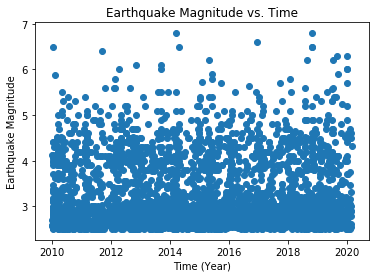

In [66]:
x = Time
y = Magnitude

plt.scatter(x, y, label = 'earthquake magnitude')
plt.ylabel('Earthquake Magnitude')
plt.xlabel('Time (Year)')
plt.title('Earthquake Magnitude vs. Time')

## Map of Earthquakes (Jan 2010 to Feb 2020)



remember the magnitude of the earthquakes are 2.5+

code based off of this website: http://introtopython.org/visualization_earthquakes.html

In [67]:
#some imports
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756056 sha256=feddfc70c1a35823b39127036ff17fe784e678d86d7b6bf4ec70312452067a59
  Stored in directory: /tmp/pip-ephem-wheel-cache-j75ug9ca/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


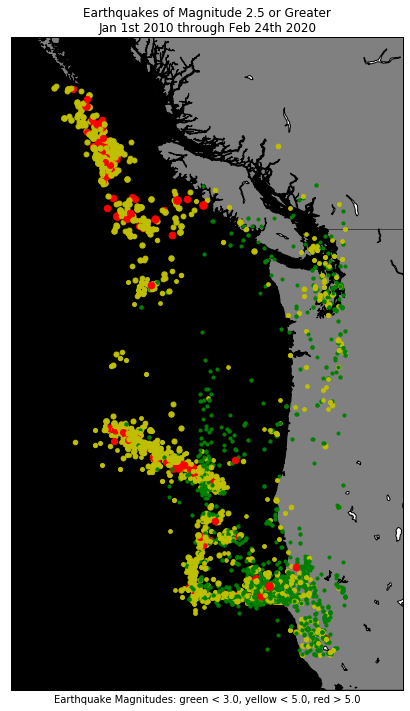

In [68]:
#use the arrays from earlier:

#print('lat_array', lat_array[0:5])
#print('long_array', long_array[0:5])

import csv

# Open the earthquake data file.
#filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = lat_array, long_array
magnitudes = mag_array
timestrings = time_array

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
##with open(filename) as f:
    # Create a csv reader object.
   # reader = csv.reader(f)
    
    # Ignore the header row.
    #next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
  #  for row in reader:
       # lats.append(float(row[1]))
        #lons.append(float(row[2]))
        #magnitudes.append(float(row[4]))
       # timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

###COLORS: green < 3.0, yellow < 5.0, red > 5.0####
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
 #             lat_0=0, lon_0=-130)

eq_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1, 
    llcrnrlon=-133.25, llcrnrlat=38,
    urcrnrlon=-120.25, urcrnrlat=53) #N E S W Parameters  The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:
 


eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
#eq_map.bluemarble() #bluemarble didnt work for me?
eq_map.drawmapboundary(fill_color='black')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1.2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size #if i multiply by 1 then it should just make the market size the same size number as the magnitude number..
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 2.5 or Greater\n"
title_string += "Jan 1st 2010 through Feb 24th 2020" 
plt.title(title_string)
plt.xlabel("Earthquake Magnitudes: green < 3.0, yellow < 5.0, red > 5.0")
plt.show()

##Map of Earthquakes (April 2015)

In [0]:
#need to get just the data for April 2015 (4/2015) and make new arrays...
#on the spreasheet we want rows (1439 to 1475)
#0 on here = 2 on spreadsheet

timestrings2015 = []
lats2015=[]
lons2015=[]
mag2015 = []
for i in range (1437, 1473):
    timestrings2015.append(timestrings[i])
    lats2015.append(lat_array[i])
    lons2015.append(long_array[i])
    mag2015.append(mag_array[i])

#len(lats2015)
#len(lons2015)
#len(timestrings2015)
#len(mag2015)

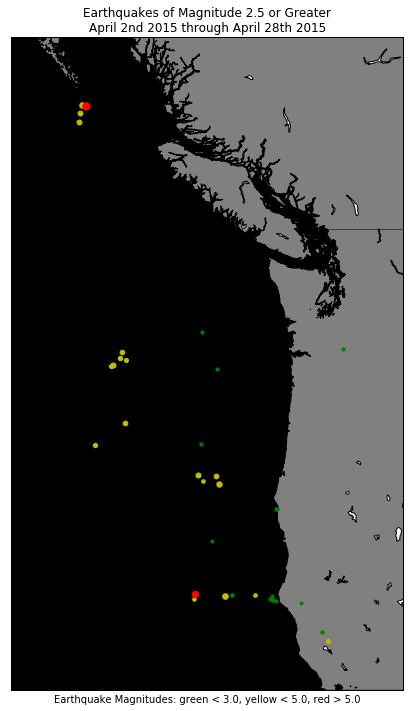

In [70]:


# use above arrays and make them equal to the lats lons magnitudes and timestamps.
lats, lons = lats2015, lons2015
magnitudes = mag2015
timestrings = timestrings2015

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
##with open(filename) as f:
    # Create a csv reader object.
   # reader = csv.reader(f)
    
    # Ignore the header row.
    #next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
  #  for row in reader:
       # lats.append(float(row[1]))
        #lons.append(float(row[2]))
        #magnitudes.append(float(row[4]))
       # timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

###COLORS: green < 3.0, yellow < 5.0, red > 5.0####
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
 #             lat_0=0, lon_0=-130)

eq_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1, 
    llcrnrlon=-133.25, llcrnrlat=38,
    urcrnrlon=-120.25, urcrnrlat=53) #N E S W Parameters  The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:
 


eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
#eq_map.bluemarble() #bluemarble didnt work for me?
eq_map.drawmapboundary(fill_color='black')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1.2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size #if i multiply by 1 then it should just make the market size the same size number as the magnitude number..
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 2.5 or Greater\n"
title_string += "April 2nd 2015 through April 28th 2015" 
plt.title(title_string)
plt.xlabel("Earthquake Magnitudes: green < 3.0, yellow < 5.0, red > 5.0")
plt.show()

# Part II: Divergent Boundary 

identify a **divergent boundary** and a **transform boundary** on the map you selected in part 1. Repeat steps 1 to 10 in each region. Show all the figures and maps. use this link to determine those boundaries: •	https://slideplayer.com/slide/14475786/

Divergent Boundary (Gorda Ridge)

In [0]:
url='https://raw.githubusercontent.com/jakep3/project3_earthquakes/master/divergent_boundary.csv'  #divergent boundary data

data = pd.read_csv(url) 


In [0]:
#Read Time, Latitude, Longitude, and Magnitude columns

Latitude = data['latitude']
Longitude = data['longitude']
Magnitude = data['mag']
Time = pd.to_datetime(data['time'], format='%Y-%m-%dT%H:%M:%S.%fZ') #the format allows it to be plotted i guess


In [0]:
#create an array with time, latitude, longitude, and mag

lat_array= np.asarray(Latitude)
long_array = np.asarray(Longitude)
mag_array = np.asarray(Magnitude)
time_array = np.asarray(Time)


#all of the above arrays are the same length and have the ability to be plotted against eachother. 

In [74]:
#getting the reange of eathquake sizes and the average earthquake size

mag_range = [min(mag_array), max(mag_array)]
print(mag_range)

mag_average = statistics.mean(mag_array)
print(mag_average)

[2.5, 5.6]
3.4109644670050763


##Scatter Plot (Mag vs Time) 

rectangle including Juan De Fuca Plate

Text(0.5, 1.0, '(Divergent Boundary) Earthquake Magnitude vs. Time')

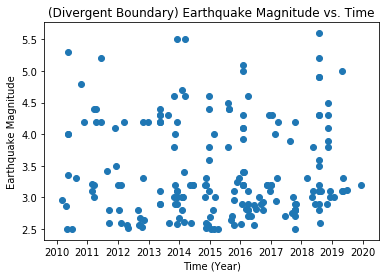

In [75]:
x = Time
y = Magnitude

plt.scatter(x, y, label = 'earthquake magnitude')
plt.ylabel('Earthquake Magnitude')
plt.xlabel('Time (Year)')
plt.title('(Divergent Boundary) Earthquake Magnitude vs. Time')

## Map of Earthquakes (Jan 2010 to Feb 2020 on Divergent Boundary)



remember the magnitude of the earthquakes are 2.5+

code based off of this website: http://introtopython.org/visualization_earthquakes.html

In [76]:
#some imports
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756032 sha256=63312ef61349e70c207574663c69e3981a569ec362d08dcfe8dbbb965aefaf8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qiwbd5yu/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


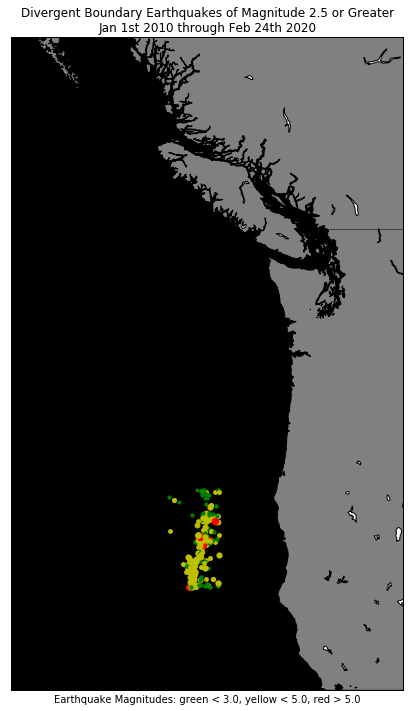

In [77]:
#use the arrays from earlier:

#print('lat_array', lat_array[0:5])
#print('long_array', long_array[0:5])

import csv

# Open the earthquake data file.
#filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = lat_array, long_array
magnitudes = mag_array
timestrings = time_array

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
##with open(filename) as f:
    # Create a csv reader object.
   # reader = csv.reader(f)
    
    # Ignore the header row.
    #next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
  #  for row in reader:
       # lats.append(float(row[1]))
        #lons.append(float(row[2]))
        #magnitudes.append(float(row[4]))
       # timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

###COLORS: green < 3.0, yellow < 5.0, red > 5.0####
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
 #             lat_0=0, lon_0=-130)

eq_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1, 
    llcrnrlon=-133.25, llcrnrlat=38,
    urcrnrlon=-120.25, urcrnrlat=53) #N E S W Parameters  The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:
 


eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
#eq_map.bluemarble() #bluemarble didnt work for me?
eq_map.drawmapboundary(fill_color='black')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1.2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size #if i multiply by 1 then it should just make the market size the same size number as the magnitude number..
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Divergent Boundary Earthquakes of Magnitude 2.5 or Greater\n"
title_string += "Jan 1st 2010 through Feb 24th 2020" 
plt.title(title_string)
plt.xlabel("Earthquake Magnitudes: green < 3.0, yellow < 5.0, red > 5.0")
plt.show()

# Part II: Transform Boundary
identify a **divergent boundary** and a **transform boundary** on the map yo selected in part 1. Repeat steps 1 to 10 in each region. Show all the figures and maps. use this link to determine those boundaries: •	https://slideplayer.com/slide/14475786/

Transform Boundary (Blanco Fracture Zone)

In [0]:
url='https://raw.githubusercontent.com/jakep3/project3_earthquakes/master/transform_boundary.csv'  #transform boundary data

data = pd.read_csv(url) 


In [0]:
#Read Time, Latitude, Longitude, and Magnitude columns

Latitude = data['latitude']
Longitude = data['longitude']
Magnitude = data['mag']
Time = pd.to_datetime(data['time'], format='%Y-%m-%dT%H:%M:%S.%fZ') #the format allows it to be plotted i guess


In [0]:
#create an array with time, latitude, longitude, and mag

lat_array= np.asarray(Latitude)
long_array = np.asarray(Longitude)
mag_array = np.asarray(Magnitude)
time_array = np.asarray(Time)


#all of the above arrays are the same length and have the ability to be plotted against eachother. 

In [81]:
#getting the range of eathquake sizes and the average earthquake size

mag_range = [min(mag_array), max(mag_array)]
print(mag_range)

mag_average = statistics.mean(mag_array)
print(mag_average)

[2.5, 6.3]
3.6356083650190114


##Scatter Plot (Mag vs Time) 

rectangle including Blanco Fracture Zone

Text(0.5, 1.0, '(Transform Boundary) Earthquake Magnitude vs. Time')

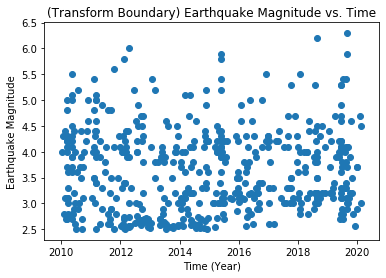

In [82]:
x = Time
y = Magnitude

plt.scatter(x, y, label = 'earthquake magnitude')
plt.ylabel('Earthquake Magnitude')
plt.xlabel('Time (Year)')
plt.title('(Transform Boundary) Earthquake Magnitude vs. Time')

## Map of Earthquakes (Jan 2010 to Feb 2020 on Transform Boundary)



remember the magnitude of the earthquakes are 2.5+

code based off of this website: http://introtopython.org/visualization_earthquakes.html

In [83]:
#some imports
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756032 sha256=08116f3216f25a91311ca90584da2083da804f39e9c9f23099fc8fe28f83280c
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu0roov9/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


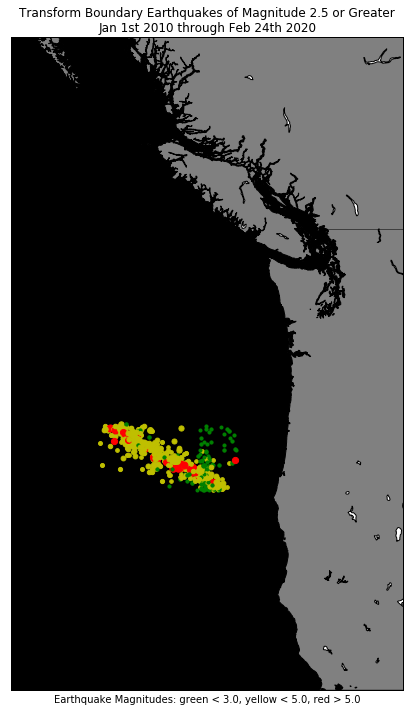

In [84]:
#use the arrays from earlier:

#print('lat_array', lat_array[0:5])
#print('long_array', long_array[0:5])

import csv

# Open the earthquake data file.
#filename = 'datasets/earthquake_data.csv'

# Create empty lists for the data we are interested in.
lats, lons = lat_array, long_array
magnitudes = mag_array
timestrings = time_array

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
##with open(filename) as f:
    # Create a csv reader object.
   # reader = csv.reader(f)
    
    # Ignore the header row.
    #next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
  #  for row in reader:
       # lats.append(float(row[1]))
        #lons.append(float(row[2]))
        #magnitudes.append(float(row[4]))
       # timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

###COLORS: green < 3.0, yellow < 5.0, red > 5.0####
def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

#eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
 #             lat_0=0, lon_0=-130)

eq_map = Basemap(projection='merc', lat_0=57, lon_0=-135,
    resolution = 'h', area_thresh = 0.1, 
    llcrnrlon=-133.25, llcrnrlat=38,
    urcrnrlon=-120.25, urcrnrlat=53) #N E S W Parameters  The notation for “lower left corner at 136.25 degrees west and 56 degrees north” is:
 


eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
#eq_map.bluemarble() #bluemarble didnt work for me?
eq_map.drawmapboundary(fill_color='black')
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 1.2
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size #if i multiply by 1 then it should just make the market size the same size number as the magnitude number..
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Transform Boundary Earthquakes of Magnitude 2.5 or Greater\n"
title_string += "Jan 1st 2010 through Feb 24th 2020" 
plt.title(title_string)
plt.xlabel("Earthquake Magnitudes: green < 3.0, yellow < 5.0, red > 5.0")
plt.show()